## Scientific Computation Lab 5

Please find a few minutes to complete the very short anonymous feedback form here: https://forms.office.com/e/P4KD3PQi2B

### Task 1: Creating a heap (to be completed after watching video on binary heaps)

heapq.heapify will re-order the elements in a list so that it can be interpreted as a binary heap. First, draw (by hand) a binary heap whose keys are the elements in the list below. Then, apply the heapify function to the list, and check that you understand how the elements have been ordered. What are the children of the element with key=2?

In [5]:
import heapq
L = [3,5,8,9,3,1,2]
#add code here
heapq.heapify(L)
print("heapified L:", L)

heapified L: [1, 3, 2, 9, 5, 8, 3]


Add answer here:

### Task 2: Simulating random walks

Here, you will work with simulations of 1-D random walks: $$X_{i+1} = X_i + R_i$$

where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). 
Code similar to that developed in lecture is provided below. Browse through the code; check that you understand how it works.

1. We discussed in lecture that increasing $M$ improves the agreement between the computed statistics and the analytical expected values. Investigate the rate of convergence of $\epsilon_i = |Xstd[i]-\sqrt{i}|$ as $M$ increases for $i=100$. Assume that $\epsilon_i \sim M^{-\gamma}$ and construct an estimate of $\gamma$ (Note: this estimate can fluctuate substantially from one run to the next). 

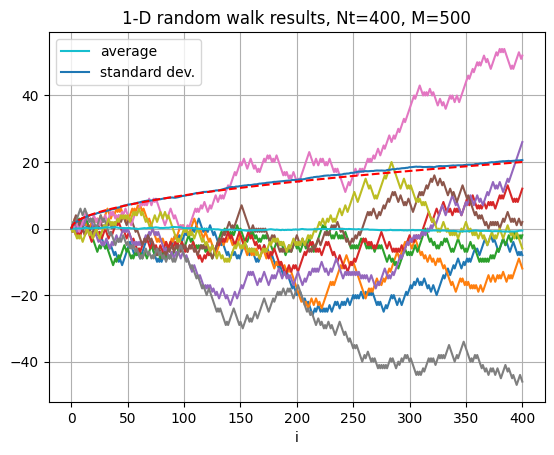

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    X = np.zeros((Nt+1,M))
    R = np.random.choice((-1,1),(Nt,M))
    
    #M Nt-step random walks
    for i in range(Nt):
        X[i+1,:] = X[i,:] + R[i,:]
        
    Xave = X.mean(axis=1)
    Xstd = X.std(axis=1)
     
        
    #display results
    if display:
        plt.figure()
        plt.plot(X[:,::60])
        plt.plot(Xave,label='average')
        plt.plot(Xstd,label='standard dev.')
        plt.plot(np.sqrt(np.arange(Nt+1)),'r--')
        plt.grid()
        plt.legend()
        plt.xlabel('i')
        plt.title('1-D random walk results, Nt=%d, M=%d' %(Nt,M))
    return X,Xave,Xstd
out = rwalk(display=True)

In [52]:
#Add code here
epsilon_is = []
gammas = []
for M in np.arange(10, 500, 10):
    x, xav, xstd = rwalk(100, M)
    epsilon = abs(xstd - np.sqrt(100))
    epsilon_is.append(epsilon)
    gammas.append(-np.log(epsilon)/np.log(M))

/var/folders/vg/6675r30x0zd96_fc4pksb0j00000gq/T/ipykernel_28680/1237206420.py:8: RuntimeWarning: divide by zero encountered in log
  gammas.append(-np.log(epsilon)/np.log(M))


In [53]:
epsilon_is

[array([1.00000000e+01, 9.02020410e+00, 8.92296704e+00, 8.50333705e+00,
        8.04040821e+00, 8.04040821e+00, 7.62513158e+00, 7.28706801e+00,
        7.43875031e+00, 7.25045458e+00, 7.20000000e+00, 7.13643579e+00,
        6.77509690e+00, 6.44472223e+00, 6.65335989e+00, 6.28516488e+00,
        6.44472223e+00, 5.87689437e+00, 6.15812546e+00, 5.87689437e+00,
        6.00000000e+00, 5.41742431e+00, 5.06441493e+00, 5.00000000e+00,
        5.18336217e+00, 4.93640444e+00, 5.00000000e+00, 4.94035574e+00,
        4.76549907e+00, 4.24152798e+00, 3.65965301e+00, 3.88117658e+00,
        3.85508340e+00, 3.37882186e+00, 3.36373599e+00, 3.86811611e+00,
        4.05021009e+00, 3.71032592e+00, 3.47619743e+00, 2.87539475e+00,
        3.47619743e+00, 3.22061950e+00, 3.86485534e+00, 3.60938188e+00,
        3.81615007e+00, 3.99666759e+00, 4.06367117e+00, 3.80000000e+00,
        3.47619743e+00, 3.68810646e+00, 3.23538619e+00, 3.31868276e+00,
        3.41516895e+00, 3.02576169e+00, 3.20000000e+00, 3.662808

In [54]:
gammas

[array([-1.        , -0.95521636, -0.95050929, -0.92958939, -0.9052781 ,
        -0.9052781 , -0.88224734, -0.86255282, -0.87149998, -0.86036524,
        -0.8573325 , -0.85348136, -0.83091551, -0.8092042 , -0.82304102,
        -0.79831667, -0.8092042 , -0.76914789, -0.78944853, -0.76914789,
        -0.77815125, -0.73379285, -0.70452928, -0.69897   , -0.71461155,
        -0.69341073, -0.69897   , -0.69375822, -0.67810839, -0.62752234,
        -0.56343991, -0.5889634 , -0.58603378, -0.52876529, -0.5268219 ,
        -0.5874995 , -0.60747755, -0.56941206, -0.54110443, -0.45869748,
        -0.54110443, -0.50793942, -0.58713324, -0.55743283, -0.58162544,
        -0.60169803, -0.60891856, -0.5797836 , -0.54110443, -0.56680345,
        -0.50992613, -0.52096574, -0.53341219, -0.48083472, -0.50514998,
        -0.56381418, -0.49510898, -0.47546499, -0.44326976, -0.48083472,
        -0.50793942, -0.39851881, -0.4384881 , -0.35246264, -0.30048687,
        -0.24096609, -0.21941123, -0.16385801, -0.1

2. You will now examine similarities between diffusion (as modeled by the 1-D diffusion equation) and random walks. 
Solving the diffusion equation, $\frac{\partial \rho}{\partial t} = \alpha \frac{\partial ^2\rho}{\partial x^2}$ on the real line with initial condition, $\rho (x,t=0) = \delta(x)$, has solution, $\rho(x,t) = \sqrt{1/(4\pi \mathcal{\alpha} t)} exp(-x^2/(4\mathcal{\alpha} t))$. You have been provided a function below which computes this solution provided $x$, $t$, and $\alpha$. Here, $\rho(x,t)$ is the probability distribution for walker location at time $t$ when $\Delta t \to 0$ and $\Delta x \to 0$  Is there a correspondence between this density and the fraction of $M$ walkers at a given location at a certain time? Compute this "walker fraction" at $t=200$, and visually compare it to the diffusion equation solution (we are just looking for qualitative similarities). Assume that a random walk step corresponds to $\Delta x= \pm 1$ and $\Delta t = 1$, and set the diffusivity to $\alpha = \Delta x^2/2\Delta t=1/2$. (Hint: np.unique may be helpful)

In [ ]:
import numpy as np
def diffusion(x,t,alpha):
    """Return solution of 1-D diffusion equation with initial condition n(x,t=0) = delta(x). 
    Note that x can be an array.
    """
    rho = np.sqrt(1/(4*np.pi*alpha*t))*np.exp(-x**2/(4*alpha*t))
    return rho

#Add code here

    
    

Add answer here:

### Task 3: Numerical solution of predator-prey dynamics using explicit Euler method (relevant material in lecture 10 slides and pre-recorded video online)

You will now use the explicit Euler method to solve the following IVP:

$\frac{dx}{dt} =  x - x y $

$\frac{dy}{dt} =  x y - y$

$x(0)=1 + \delta, ~ y(0)=1+\delta$

and $\delta$ is a parameter that you will set and vary.

The explicit Euler method advances the generic ODE, $\frac{du}{dt} = f(u,t)$, using the update equation, $u(t_0+\Delta t) = u(t_0) + \Delta t ~u(z,t_0)$ where $t_0$ is some arbitrary time.

1) You will compute a numerical solution to this problem at times $t_i=i \Delta t, ~ i=1,2,3,..., Nt$ where $\Delta t$ is the time step that you will set. The solution should be stored in an $Nt+1$ x $2$ Numpy array, z, where the first column contains $x$, the second column contains $y$, and the first row contains the initial conditions. 
Add code to the cell below to compute this solution using the explicit Euler method. Initially set $\Delta t=0.01$, $\delta = 0.05$, and $Nt=2000$. Make a plot that displays both $x(t)$ and $y(t)$. The solutions should be oscillatory -- does the frequency of oscillation match what you expect based on analytical results for small perturbations?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
delta = 0.05
Dt = 0.01
Nt = 2000
t = np.linspace(0,Nt*Dt,Nt+1)
z = np.zeros((Nt+1,2))
z[0,:] = 1 + delta
#Add code here


Add answer here

2) Now compute solutions over the same timespan with $\Delta t=0.1$ and $\Delta t=0.001$. Create a plot of $x$ vs. $t$ for all three values of $\Delta t$ used. Can you explain the results shown in the plot?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Add code here
    

Add answer here

### Task 4 (optional): Practice with arrays, eigenvalues and eigenvectors
These are a few exercises to give you practice with numerical linear algebra and numpy 

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [13]:
import numpy as np
#Add code here
N = np.random.rand(3, 3)

2) Compute the eigenvalues and eigenvectors of N:

In [30]:
#Add code here
eigs = np.linalg.eig(N)
lam1 = eigs[0][0]
v1 = eigs[1][0]

3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [31]:
#Add code here
np.linalg.det(N - lam1*np.identity(3))

(3.951175612236912e-16+0j)

4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [33]:
#Add code here
np.dot(N, v1) - lam1*v1

array([ 0.1040544 +0.j, -0.59630512+0.j,  0.4321066 +0.j])

**Note:** Python uses double precision arithmetic when working with floats, so we expect about 16 digits on precision for a numerical calculation. Consequently, a float with a magnitude that is $\approx 1e-15$ or smaller can be interpreted as zero.